
<a id='lqramsey'></a>
<ul class="badges">
        <li><a href="#"><img src="/_static/img/jupyter-notebook-download-blue.svg" id="notebook_download_badge"></a></li>
        <li><a href="#"><img src="/_static/img/pdf-download-blue.svg" id="pdf_download_badge"></a></li>
        <li><a href="/status.html"><img src="https://img.shields.io/badge/Execution%20test-not%20available-lightgrey.svg" id="executability_status_badge"></a></li>
</ul>

<script>
var path = window.location.pathname;
var pageName = path.split("/").pop().split(".")[0];
var notebookDownloadLink = ["/", "_downloads/ipynb/jl/", pageName, ".ipynb"].join("");
document.getElementById('notebook_download_badge').parentElement.setAttribute('href', notebookDownloadLink);
var pdfDownloadLink = ["/", "_downloads/pdf/jl/", pageName, ".pdf"].join("");
document.getElementById('pdf_download_badge').parentElement.setAttribute('href', pdfDownloadLink);
</script>

<a href="/status.html"><img src="https://img.shields.io/badge/Execution%20test-not%20available-lightgrey.svg" id="executability_status_badge"></a>

<div class="how-to">
        <a href="#" class="toggle"><span class="icon icon-angle-double-down"></span>How to read this lecture...</a>
        <div class="how-to-content">
                <p>Code should execute sequentially if run in a Jupyter notebook</p>
                <ul>
                        <li>See the <a href="/jl/getting_started.html">set up page</a> to install Jupyter, Julia (1.0+) and all necessary libraries</li>
                        <li>Please direct feedback to <a href="mailto:contact@quantecon.org">contact@quantecon.org</a> or the <a href="http://discourse.quantecon.org/">discourse forum</a></li>
                        <li>For some notebooks, enable content with "Trust" on the command tab of Jupyter lab</li>
                        <li>If using QuantEcon lectures for the first time on a computer, execute <tt>] add InstantiateFromURL</tt> inside of a notebook or the REPL</li>
                </ul>
        </div>
</div>

# Optimal Taxation in an LQ Economy


<a id='index-1'></a>

## Contents

- [Optimal Taxation in an LQ Economy](#Optimal-Taxation-in-an-LQ-Economy)  
  - [Overview](#Overview)  
  - [The Ramsey Problem](#The-Ramsey-Problem)  
  - [Implementation](#Implementation)  
  - [Examples](#Examples)  
  - [Exercises](#Exercises)  
  - [Solutions](#Solutions)  

## Overview

In this lecture we study optimal fiscal policy in a linear quadratic setting

We slightly modify a well-known model of Robert Lucas and Nancy Stokey [[LS83]](https://lectures.quantecon.org/jl/zreferences.html#lucasstokey1983) so that convenient formulas for
solving linear-quadratic models can be applied to simplify the calculations

The economy consists of a representative household and a benevolent government

The government finances an exogenous stream of government purchases with state-contingent loans and a linear tax on labor income

A linear tax is sometimes called a flat-rate tax

The household maximizes utility by choosing paths for consumption and labor, taking prices and the government’s tax rate and borrowing plans as given

Maximum attainable utility for the household depends on the government’s tax and borrowing plans

The *Ramsey problem* [[Ram27]](https://lectures.quantecon.org/jl/zreferences.html#ramsey1927) is  to choose tax and borrowing plans that maximize the household’s welfare, taking the household’s optimizing behavior as given

There is a large number of competitive equilibria indexed by different government fiscal policies

The Ramsey planner chooses the best competitive equilibrium

We want to study  the dynamics of tax rates,  tax revenues, government debt under a Ramsey plan

Because the Lucas and Stokey model features state-contingent government debt, the government debt dynamics differ substantially from those in a model of Robert Barro [[Bar79]](https://lectures.quantecon.org/jl/zreferences.html#barro1979)

The treatment given here closely follows <a href=/_static/pdfs/firenze.pdf download>this manuscript</a>, prepared
by Thomas J. Sargent and Francois R. Velde

We cover only the key features of the problem in this lecture, leaving you to refer to that source for additional results and intuition

### Model Features

- Linear quadratic (LQ) model  
- Representative household  
- Stochastic dynamic programming over an infinite horizon  
- Distortionary taxation  

### Setup

In [1]:
using InstantiateFromURL
activate_github("QuantEcon/QuantEconLecturePackages", tag = "v0.9.7");

┌ Warning: On Windows, creating file symlinks requires Administrator privileges
└ @ Base.Filesystem file.jl:794


In [2]:
using LinearAlgebra, Statistics, Compat

## The Ramsey Problem

We begin by outlining the key assumptions regarding technology, households and the government sector

### Technology

Labor can be converted one-for-one into a single, non-storable consumption good

In the usual spirit of the LQ model, the amount of labor supplied in each period is unrestricted

This is unrealistic, but helpful when it comes to solving the model

Realistic labor supply can be induced by suitable parameter values

### Households

Consider a representative household who chooses a path $ \{\ell_t, c_t\} $
for labor and consumption to maximize


<a id='equation-lq-hu'></a>
$$
-\mathbb E \frac{1}{2} \sum_{t=0}^{\infty} \beta^t
\left[
   (c_t - b_t)^2 + \ell_t^2
\right] \tag{1}
$$

subject to the budget constraint


<a id='equation-lq-hc'></a>
$$
\mathbb E \sum_{t=0}^{\infty} \beta^t p^0_t
\left[
    d_t + (1 - \tau_t) \ell_t + s_t - c_t
\right] = 0 \tag{2}
$$

Here

- $ \beta $ is a discount factor in $ (0, 1) $  
- $ p_t^0 $ is a scaled Arrow-Debreu price at time $ 0 $ of history contingent goods at time $ t+j $  
- $ b_t $ is a stochastic preference parameter  
- $ d_t $ is an endowment process  
- $ \tau_t $ is a flat tax rate on labor income  
- $ s_t $ is a promised time-$ t $ coupon payment on debt issued by the government  


The scaled Arrow-Debreu price $ p^0_t $ is related to the unscaled Arrow-Debreu price as follows.

If we let $ \pi^0_t(x^t) $
denote the probability (density) of a history $ x^t = [x_t, x_{t-1}, \ldots, x_0] $ of the state $ x^t $, then
the Arrow-Debreu time $ 0 $ price of a claim on one unit of consumption at date $ t $, history $ x^t $ would be

$$
\frac{\beta^t p^0_t} {\pi_t^0(x^t)}
$$

Thus, our scaled Arrow-Debreu price is the ordinary Arrow-Debreu price multiplied by the discount factor $ \beta^t $ and divided
by an appropriate probability.

The budget constraint [(2)](#equation-lq-hc) requires that the present value of consumption be restricted to equal the present value of endowments, labor income and coupon payments on bond holdings

### Government

The government imposes a linear tax on labor income, fully committing to a stochastic path of tax rates at time zero

The government also issues state-contingent debt

Given government tax and borrowing plans, we can construct a competitive equilibrium with distorting government taxes

Among all such competitive equilibria, the Ramsey plan is the one that maximizes the welfare of the representative consumer

### Exogenous Variables

Endowments, government expenditure, the preference shock process $ b_t $, and
promised coupon payments on initial government debt $ s_t $ are all exogenous, and given by

- $ d_t = S_d x_t $  
- $ g_t = S_g x_t $  
- $ b_t = S_b x_t $  
- $ s_t = S_s x_t $  


The matrices $ S_d, S_g, S_b, S_s $ are primitives and $ \{x_t\} $ is
an exogenous stochastic process taking values in $ \mathbb R^k $

We consider two specifications for $ \{x_t\} $


<a id='lq-twospec'></a>
1. Discrete case: $ \{x_t\} $ is a discrete state Markov chain with transition matrix $ P $  
1. VAR case: $ \{x_t\} $ obeys $ x_{t+1} = A x_t + C w_{t+1} $ where $ \{w_t\} $ is independent zero mean Gaussian with identify covariance matrix  

### Feasibility

The period-by-period feasibility restriction for this economy is


<a id='equation-lq-feasible'></a>
$$
c_t + g_t = d_t + \ell_t \tag{3}
$$

A labor-consumption process $ \{\ell_t, c_t\} $ is called *feasible* if [(3)](#equation-lq-feasible) holds for all $ t $

### Government budget constraint

Where $ p_t^0 $ is again a scaled Arrow-Debreu price, the time zero government budget constraint is


<a id='equation-lq-gc'></a>
$$
\mathbb E \sum_{t=0}^{\infty} \beta^t p^0_t
(s_t + g_t - \tau_t \ell_t ) = 0 \tag{4}
$$

### Equilibrium

An *equilibrium* is a feasible allocation $ \{\ell_t, c_t\} $, a sequence
of prices $ \{p_t^0\} $, and a tax system $ \{\tau_t\} $ such that

1. The allocation $ \{\ell_t, c_t\} $ is optimal for the household given $ \{p_t^0\} $ and $ \{\tau_t\} $  
1. The government’s budget constraint [(4)](#equation-lq-gc) is satisfied  


The *Ramsey problem* is to choose the equilibrium $ \{\ell_t, c_t, \tau_t, p_t^0\} $ that maximizes the
household’s welfare

If $ \{\ell_t, c_t, \tau_t, p_t^0\} $ solves the Ramsey problem,
then $ \{\tau_t\} $ is called the *Ramsey plan*

The solution procedure we adopt is

1. Use the first-order conditions from the household problem to pin down
  prices and allocations given $ \{\tau_t\} $  
1. Use these expressions to rewrite the government budget constraint
  [(4)](#equation-lq-gc) in terms of exogenous variables and allocations  
1. Maximize the household’s objective function [(1)](#equation-lq-hu) subject to the
  constraint constructed in step 2 and the feasibility constraint
  [(3)](#equation-lq-feasible)  


The solution to this maximization problem pins down all quantities of interest

### Solution

Step one is to obtain the first-conditions for the household’s problem,
taking taxes and prices as given

Letting $ \mu $ be the Lagrange multiplier on [(2)](#equation-lq-hc), the first-order
conditions are $ p_t^0 = (c_t - b_t) / \mu $ and $ \ell_t = (c_t - b_t)
(1 - \tau_t) $

Rearranging and normalizing at $ \mu = b_0 - c_0 $, we can write these
conditions as


<a id='equation-lq-hfoc'></a>
$$
p_t^0 = \frac{b_t - c_t}{b_0 - c_0}
\quad \text{and} \quad
\tau_t = 1 - \frac{\ell_t}{b_t - c_t} \tag{5}
$$

Substituting [(5)](#equation-lq-hfoc) into the government’s budget constraint [(4)](#equation-lq-gc)
yields


<a id='equation-lq-gc2'></a>
$$
\mathbb E \sum_{t=0}^{\infty} \beta^t
\left[ (b_t - c_t)(s_t + g_t - \ell_t) + \ell_t^2 \right] = 0 \tag{6}
$$

The Ramsey problem now amounts to maximizing [(1)](#equation-lq-hu) subject to
[(6)](#equation-lq-gc2) and [(3)](#equation-lq-feasible)

The associated Lagrangian is


<a id='equation-lq-rp'></a>
$$
\mathscr L =
\mathbb E  \sum_{t=0}^{\infty} \beta^t
\left\{
-\frac{1}{2} \left[ (c_t - b_t)^2 + \ell_t^2 \right] +
\lambda
\left[ (b_t - c_t)(\ell_t - s_t - g_t) - \ell_t^2 \right] +
\mu_t
[d_t + \ell_t - c_t - g_t]
\right\} \tag{7}
$$

The first order conditions associated with $ c_t $ and $ \ell_t $ are

$$
-(c_t - b_t ) + \lambda [- \ell_t + (g_t + s_t )] = \mu_t
$$

and

$$
\ell_t - \lambda [(b_t - c_t) - 2 \ell_t ] = \mu_t
$$

Combining these last two equalities with [(3)](#equation-lq-feasible) and working
through the algebra, one can show that


<a id='equation-lq-lcex'></a>
$$
\ell_t = \bar \ell_t - \nu m_t
\quad \text{and} \quad
c_t = \bar c_t - \nu m_t \tag{8}
$$

where

- $ \nu := \lambda / (1 + 2 \lambda) $  
- $ \bar \ell_t := (b_t - d_t + g_t) / 2 $  
- $ \bar c_t := (b_t + d_t - g_t) / 2 $  
- $ m_t := (b_t - d_t - s_t ) / 2 $  


Apart from $ \nu $, all of these quantities are expressed in terms of exogenous variables

To solve for $ \nu $, we can use the government’s budget constraint again

The term inside the brackets in [(6)](#equation-lq-gc2) is $ (b_t - c_t)(s_t + g_t) - (b_t - c_t) \ell_t + \ell_t^2 $

Using [(8)](#equation-lq-lcex), the definitions above and the fact that $ \bar \ell
= b - \bar c $, this term can be rewritten as

$$
(b_t - \bar c_t) (g_t + s_t ) + 2 m_t^2 ( \nu^2 - \nu)
$$

Reinserting into [(6)](#equation-lq-gc2), we get


<a id='equation-lq-gc22'></a>
$$
\mathbb E
\left\{
\sum_{t=0}^{\infty} \beta^t
(b_t - \bar c_t) (g_t + s_t )
\right\}
+
( \nu^2 - \nu) \mathbb E
\left\{
\sum_{t=0}^{\infty} \beta^t 2 m_t^2
\right\}
= 0 \tag{9}
$$

Although it might not be clear yet, we are nearly there because:

- The two expectations terms in [(9)](#equation-lq-gc22) can be solved for in terms of model primitives  
- This in turn allows us to solve for the Lagrange multiplier $ \nu $  
- With $ \nu $ in hand, we can go back and solve for the allocations via [(8)](#equation-lq-lcex)  
- Once we have the allocations, prices and the tax system can be derived from
  [(5)](#equation-lq-hfoc)  

### Computing the Quadratic Term

Let’s consider how to obtain the term $ \nu $ in [(9)](#equation-lq-gc22)

If we can compute the two expected geometric sums


<a id='equation-lq-gc3'></a>
$$
b_0 := \mathbb E
\left\{
\sum_{t=0}^{\infty} \beta^t
(b_t - \bar c_t) (g_t + s_t )
\right\}
\quad \text{and} \quad
a_0 := \mathbb E
\left\{
\sum_{t=0}^{\infty} \beta^t 2 m_t^2
\right\} \tag{10}
$$

then the problem reduces to solving

$$
b_0 + a_0 (\nu^2 - \nu) = 0
$$

for $ \nu $

Provided that $ 4 b_0 < a_0 $, there is a unique solution $ \nu \in
(0, 1/2) $, and a unique corresponding $ \lambda > 0 $

Let’s work out how to compute mathematical expectations  in [(10)](#equation-lq-gc3)

For the first one, the random variable $ (b_t - \bar c_t) (g_t + s_t ) $ inside the summation can be expressed as

$$
\frac{1}{2} x_t' (S_b - S_d + S_g)' (S_g + S_s) x_t
$$

For the second expectation in [(10)](#equation-lq-gc3), the random variable $ 2 m_t^2 $ can be written as

$$
\frac{1}{2} x_t' (S_b - S_d - S_s)' (S_b - S_d - S_s) x_t
$$

It follows that both objects of interest are special cases of the expression


<a id='equation-lq-eqs'></a>
$$
q(x_0) = \mathbb E \sum_{t=0}^{\infty} \beta^t x_t' H x_t \tag{11}
$$

where $ H $ is a matrix conformable to $ x_t $ and $ x_t' $ is the transpose of column vector $ x_t $

Suppose first that $ \{x_t\} $ is the Gaussian VAR described [above](#lq-twospec)

In this case, the formula for computing $ q(x_0) $ is known to be $ q(x_0) = x_0' Q x_0 + v $, where

- $ Q $ is the solution to $ Q = H + \beta A' Q A $, and  
- $ v = \text{trace} \, (C' Q C) \beta / (1 - \beta) $  


The first equation is known as a discrete Lyapunov equation, and can be solved
using [this function](https://github.com/QuantEcon/QuantEcon.jl/blob/master/src/matrix_eqn.jl#L6)

### Finite state Markov case

Next suppose that $ \{x_t\} $ is the discrete Markov process described [above](#lq-twospec)

Suppose further that each $ x_t $ takes values in the state space $ \{x^1, \ldots, x^N\} \subset \mathbb R^k $

Let $ h \colon \mathbb R^k \to \mathbb R $ be a given function, and suppose that we
wish to evaluate

$$
q(x_0) = \mathbb E \sum_{t=0}^{\infty} \beta^t h(x_t)
\quad \text{given} \quad x_0 = x^j
$$

For example, in the discussion above, $ h(x_t) = x_t' H x_t $

It is legitimate to pass the expectation through the sum, leading to


<a id='equation-lq-ise'></a>
$$
q(x_0) = \sum_{t=0}^{\infty} \beta^t (P^t h)[j] \tag{12}
$$

Here

- $ P^t $ is the $ t $-th power of the transition matrix $ P $  
- $ h $ is, with some abuse of notation, the vector $ (h(x^1), \ldots, h(x^N)) $  
- $ (P^t h)[j] $ indicates the $ j $-th element of $ P^t h $  


It can be show that [(12)](#equation-lq-ise) is in fact equal to the $ j $-th element of
the vector $ (I - \beta P)^{-1} h $

This last fact is applied in the calculations below

### Other Variables

We are interested in tracking several other variables besides the ones
described above.

To prepare the way for this, we define

$$
p^t_{t+j} = \frac{b_{t+j}- c_{t+j}}{b_t - c_t}
$$

as the scaled Arrow-Debreu time $ t $ price of a history contingent claim on one unit of consumption at time $ t+j $

These are prices that would prevail at time $ t $ if market were reopened at time $ t $

These prices are constituents of the present value of government obligations outstanding at time $ t $, which can be expressed as


<a id='equation-lq-cb'></a>
$$
B_t :=
\mathbb E_t \sum_{j=0}^{\infty} \beta^j p^t_{t+j}
(\tau_{t+j} \ell_{t+j} - g_{t+j}) \tag{13}
$$

Using our expression for prices and the Ramsey plan, we can also write
$ B_t $ as

$$
B_t =
\mathbb E_t \sum_{j=0}^{\infty} \beta^j
\frac{ (b_{t+j} - c_{t+j})(\ell_{t+j} - g_{t+j}) - \ell^2_{t+j} }
{ b_t - c_t }
$$

This version is more convenient for computation

Using the equation

$$
p^t_{t+j} = p^t_{t+1} p^{t+1}_{t+j}
$$

it is possible to verity that [(13)](#equation-lq-cb) implies that

$$
B_t = (\tau_t \ell_t - g_t) + E_t \sum_{j=1}^\infty p^t_{t+j} (\tau_{t+j} \ell_{t+j} - g_{t+j})
$$

and


<a id='equation-lq-cb22'></a>
$$
B_t =   (\tau_t \ell_t - g_t) + \beta E_t p^t_{t+1} B_{t+1} \tag{14}
$$

Define


<a id='equation-lq-rfr'></a>
$$
R^{-1}_{t} := \mathbb E_t \beta^j p^t_{t+1} \tag{15}
$$

$ R_{t} $ is the gross $ 1 $-period risk-free rate for loans
between $ t $ and $ t+1 $

### A Martingale

We now want to study the following two objects, namely,

$$
\pi_{t+1} := B_{t+1} - R_t [B_t - (\tau_t \ell_t - g_t)]
$$

and the cumulation of $ \pi_t $

$$
\Pi_t := \sum_{s=0}^t \pi_t
$$

The term $ \pi_{t+1} $ is the difference between two quantities:

> - $ B_{t+1} $, the value of government debt at the start of period $ t+1 $  
- $ R_t [B_t + g_t - \tau_t ] $, which is what the government would have owed at the beginning of
  period $ t+1 $ if it had simply borrowed at the one-period risk-free rate rather than selling state-contingent securities  



Thus, $ \pi_{t+1} $ is the excess payout on the actual portfolio of state contingent government debt  relative to an alternative
portfolio sufficient to finance $ B_t + g_t - \tau_t \ell_t $ and consisting entirely of risk-free one-period bonds

Use expressions [(14)](#equation-lq-cb22) and [(15)](#equation-lq-rfr) to obtain

$$
\pi_{t+1} = B_{t+1} - \frac{1}{\beta E_t p^t_{t+1}} \left[\beta E_t p^t_{t+1} B_{t+1} \right]
$$

or


<a id='equation-lq-pidist'></a>
$$
\pi_{t+1} = B_{t+1} - \tilde E_t B_{t+1} \tag{16}
$$

where $ \tilde E_t $ is the conditional mathematical expectation taken with respect to a one-step transition density
that has been formed by multiplying the original transition density with the likelihood ratio

$$
m^t_{t+1} = \frac{p^t_{t+1}}{E_t p^t_{t+1}}
$$

It follows from equation [(16)](#equation-lq-pidist) that

$$
\tilde E_t \pi_{t+1} = \tilde E_t B_{t+1} - \tilde E_t B_{t+1} = 0
$$

which asserts that $ \{\pi_{t+1}\} $ is a martingale difference sequence under the distorted probability measure, and
that  $ \{\Pi_t\} $ is a martingale under the distorted probability measure

In the tax-smoothing model of Robert Barro [[Bar79]](https://lectures.quantecon.org/jl/zreferences.html#barro1979), government debt is a random walk

In the current model, government debt $ \{B_t\} $ is not a random walk, but the `excess payoff` $ \{\Pi_t\} $ on it  is

## Implementation

The following code provides functions for

1. Solving for the Ramsey plan given a specification of the economy  
1. Simulating the dynamics of the major variables  


Description and clarifications are given below

In [3]:
using QuantEcon, Plots, LinearAlgebra, Parameters

abstract type AbstractStochProcess end

struct ContStochProcess{TF <: AbstractFloat} <: AbstractStochProcess
    A::Matrix{TF}
    C::Matrix{TF}
end


struct DiscreteStochProcess{TF <: AbstractFloat} <: AbstractStochProcess
    P::Matrix{TF}
    x_vals::Matrix{TF}
end

struct Economy{TF <: AbstractFloat, SP <: AbstractStochProcess}
    β::TF
    Sg::Matrix{TF}
    Sd::Matrix{TF}
    Sb::Matrix{TF}
    Ss::Matrix{TF}
    proc::SP
end

function compute_exog_sequences(econ, x)
    # compute exogenous variable sequences
    Sg, Sd, Sb, Ss = econ.Sg, econ.Sd, econ.Sb, econ.Ss
    g, d, b, s = [dropdims(S * x, dims = 1) for S in (Sg, Sd, Sb, Ss)]

    #= solve for Lagrange multiplier in the govt budget constraint
    In fact we solve for ν = λ / (1 + 2*λ).  Here ν is the
    solution to a quadratic equation a(ν^2 - ν) + b = 0 where
    a and b are expected discounted sums of quadratic forms of the state. =#
    Sm = Sb - Sd - Ss

    return g, d, b, s, Sm
end


function compute_allocation(econ, Sm, ν, x, b)
    Sg, Sd, Sb, Ss = econ.Sg, econ.Sd, econ.Sb, econ.Ss

    # solve for the allocation given ν and x
    Sc = 0.5 .* (Sb + Sd - Sg - ν .* Sm)
    Sl = 0.5 .* (Sb - Sd + Sg - ν .* Sm)
    c = dropdims(Sc * x, dims = 1)
    l = dropdims(Sl * x, dims = 1)
    p = dropdims((Sb - Sc) * x, dims = 1)  # Price without normalization
    τ = 1 .- l ./ (b .- c)
    rvn = l .* τ

    return Sc, Sl, c, l, p, τ, rvn
end


function compute_ν(a0, b0)
    disc = a0^2 - 4a0 * b0

    if disc ≥ 0
        ν = 0.5 *(a0 - sqrt(disc)) / a0
    else
        println("There is no Ramsey equilibrium for these parameters.")
        error("Government spending (economy.g) too low")
    end

    # Test that the Lagrange multiplier has the right sign
    if ν * (0.5 - ν) < 0
        print("Negative multiplier on the government budget constraint.")
        error("Government spending (economy.g) too low")
    end

    return ν
end


function compute_Π(B, R, rvn, g, ξ)
    π = B[2:end] - R[1:end-1] .* B[1:end-1] - rvn[1:end-1] + g[1:end-1]
    Π = cumsum(π .* ξ)
    return π, Π
end


function compute_paths(econ::Economy{<:AbstractFloat, <:DiscreteStochProcess}, T)
    # simplify notation
    @unpack β, Sg, Sd, Sb, Ss = econ
    @unpack P, x_vals = econ.proc

    mc = MarkovChain(P)
    state = simulate(mc, T, init=1)
    x = x_vals[:, state]

    # Compute exogenous sequence
    g, d, b, s, Sm = compute_exog_sequences(econ, x)

    # compute a0, b0
    ns = size(P, 1)
    F = I - β.*P
    a0 = (F \ ((Sm * x_vals)'.^2))[1] ./ 2
    H = ((Sb - Sd + Sg) * x_vals) .* ((Sg - Ss)*x_vals)
    b0 = (F \ H')[1] ./ 2

    # compute lagrange multiplier
    ν = compute_ν(a0, b0)

    # Solve for the allocation given ν and x
    Sc, Sl, c, l, p, τ, rvn = compute_allocation(econ, Sm, ν, x, b)

    # compute remaining variables
    H = ((Sb - Sc) * x_vals) .* ((Sl - Sg) * x_vals) - (Sl * x_vals).^2
    temp = dropdims(F * H', dims = 2)
    B = temp[state] ./ p
    H = dropdims(P[state, :] * ((Sb - Sc) * x_vals)', dims = 2)
    R = p ./ (β .* H)
    temp = dropdims(P[state, :] *((Sb - Sc) * x_vals)', dims = 2)
    ξ = p[2:end] ./ temp[1:end-1]

    # compute π
    π, Π = compute_Π(B, R, rvn, g, ξ)

    return (g = g, d = d, b = b, s = s, c = c,
            l = l, p = p, τ = τ, rvn = rvn, B = B,
            R = R, π = π, Π = Π, ξ = ξ)
end

function compute_paths(econ::Economy{<:AbstractFloat, <:ContStochProcess}, T)
    # simplify notation
    @unpack β, Sg, Sd, Sb, Ss = econ
    @unpack A, C = econ.proc

    # generate an initial condition x0 satisfying x0 = A x0
    nx, nx = size(A)
    x0 = nullspace(I - A)
    x0 = x0[end] < 0 ? -x0 : x0
    x0 = x0 ./ x0[end]
    x0 = dropdims(x0, dims = 2)

    # generate a time series x of length T starting from x0
    nx, nw = size(C)
    x = zeros(nx, T)
    w = randn(nw, T)
    x[:, 1] = x0
    for t in 2:T
        x[:, t] = A *x[:, t-1] + C * w[:, t]
    end

    # compute exogenous sequence
    g, d, b, s, Sm = compute_exog_sequences(econ, x)

    # compute a0 and b0
    H = Sm'Sm
    a0 = 0.5 * var_quadratic_sum(A, C, H, β, x0)
    H = (Sb - Sd + Sg)'*(Sg + Ss)
    b0 = 0.5 * var_quadratic_sum(A, C, H, β, x0)

    # compute lagrange multiplier
    ν = compute_ν(a0, b0)

    # solve for the allocation given ν and x
    Sc, Sl, c, l, p, τ, rvn = compute_allocation(econ, Sm, ν, x, b)

    # compute remaining variables
    H = Sl'Sl - (Sb - Sc)' *(Sl - Sg)
    L = zeros(T)
    for t in eachindex(L)
        L[t] = var_quadratic_sum(A, C, H, β, x[:, t])
    end
    B = L ./ p
    Rinv = dropdims(β .* (Sb- Sc)*A*x, dims = 1) ./ p
    R = 1 ./ Rinv
    AF1 = (Sb - Sc) * x[:, 2:end]
    AF2 = (Sb - Sc) * A * x[:, 1:end-1]
    ξ =  AF1 ./ AF2
    ξ = dropdims(ξ, dims = 1)

    # compute π
    π, Π = compute_Π(B, R, rvn, g, ξ)

    return (g = g, d = d, b = b, s = s,
            c = c, l = l, p = p, τ = τ,
            rvn = rvn, B = B, R = R,
            π = π, Π = Π, ξ = ξ)
end

function gen_fig_1(path)
    T = length(path.c)

    plt_1 = plot(path.rvn, lw=2, label = "tau_t l_t")
    plot!(plt_1, path.g, lw=2, label= "g_t")
    plot!(plt_1, path.c, lw=2, label= "c_t")
    plot!(xlabel="Time", grid=true)

    plt_2 = plot(path.rvn, lw=2, label="tau_t l_t")
    plot!(plt_2, path.g, lw=2, label="g_t")
    plot!(plt_2, path.B[2:end], lw=2, label="B_(t+1)")
    plot!(xlabel="Time", grid=true)

    plt_3 = plot(path.R, lw=2, label="R_(t-1)")
    plot!(plt_3, xlabel="Time", grid=true)

    plt_4 = plot(path.rvn, lw=2, label="tau_t l_t")
    plot!(plt_4, path.g, lw=2, label="g_t")
    plot!(plt_4, path.π, lw=2, label="pi_t")
    plot!(plt_4, xlabel="Time", grid=true)

    plot(plt_1, plt_2, plt_3, plt_4, layout=(2,2), size = (800,600))
end

function gen_fig_2(path)

    T = length(path.c)

    paths = [path.ξ, path.Π]
    labels = ["xi_t", "Pi_t"]
    plt_1 = plot()
    plt_2 = plot()
    plots = [plt_1, plt_2]

    for (plot, path, label) in zip(plots, paths, labels)
        plot!(plot, 2:T, path, lw=2, label=label, xlabel="Time", grid=true)
    end
    plot(plt_1, plt_2, layout=(2,1), size = (600,500))
end

gen_fig_2 (generic function with 1 method)

### Comments on the Code

The function `var_quadratic_sum` From `QuantEcon.jl` is for computing the value of [(11)](#equation-lq-eqs)
when the exogenous process $ \{ x_t \} $ is of the VAR type described [above](#lq-twospec)

This code defines two Types: `Economy` and `Path`

The first is used to collect all the parameters and primitives of a given LQ
economy, while the second collects output of the computations

## Examples

Let’s look at two examples of usage


<a id='lq-cc'></a>

### The Continuous Case

Our first example adopts the VAR specification described [above](#lq-twospec)

Regarding the primitives, we set

- $ \beta = 1 / 1.05 $  
- $ b_t = 2.135 $ and $ s_t = d_t = 0 $ for all $ t $  


Government spending evolves according to

$$
g_{t+1} - \mu_g = \rho (g_t - \mu_g) + C_g w_{g, t+1}
$$

with $ \rho = 0.7 $, $ \mu_g = 0.35 $ and $ C_g = \mu_g \sqrt{1 - \rho^2} / 10 $

Here’s the code

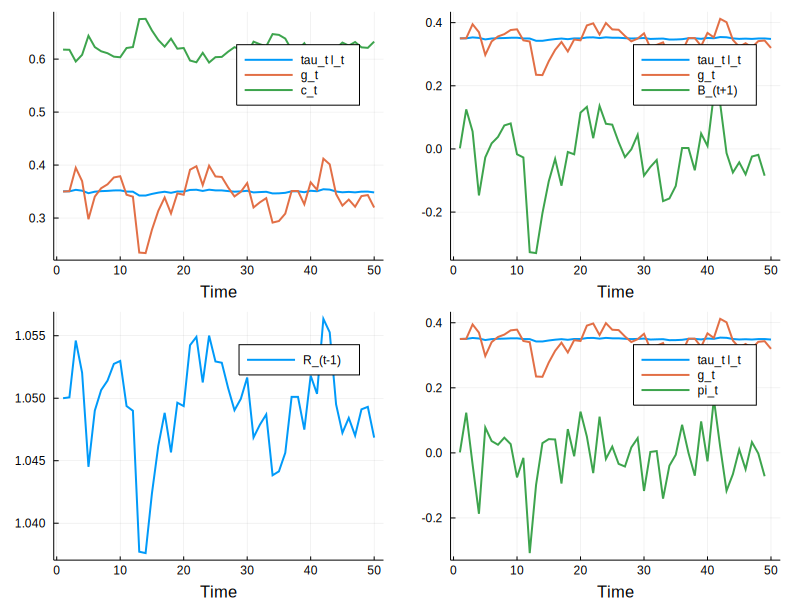

In [4]:
# for reproducible results
using Random
Random.seed!(42)

# parameters
β = 1 / 1.05
ρ, mg = .7, .35
A = [ρ mg*(1 - ρ); 0.0 1.0]
C = [sqrt(1 - ρ^2) * mg / 10 0.0; 0 0]
Sg = [1.0 0.0]
Sd = [0.0 0.0]
Sb = [0 2.135]
Ss = [0.0 0.0]
proc = ContStochProcess(A, C)

econ = Economy(β, Sg, Sd, Sb, Ss, proc)
T = 50
path = compute_paths(econ, T)

gen_fig_1(path)

The legends on the figures indicate the variables being tracked

Most obvious from the figure is tax smoothing in the sense that tax revenue is
much less variable than government expenditure

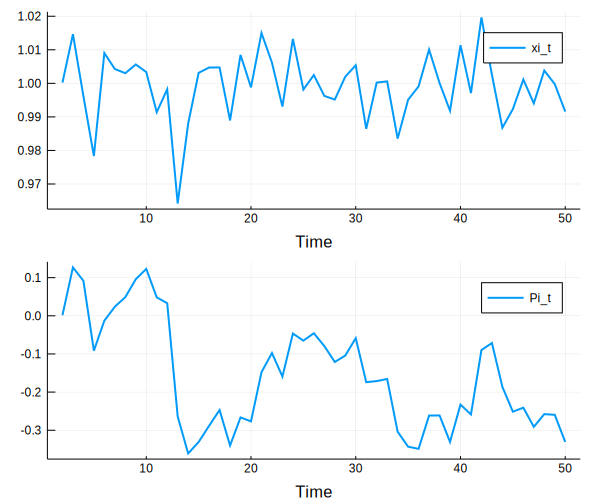

In [5]:
gen_fig_2(path)

See the original <a href=/_static/pdfs/firenze.pdf download>manuscript</a> for comments and interpretation

### The Discrete Case

Our second example adopts a discrete Markov specification for the exogenous process

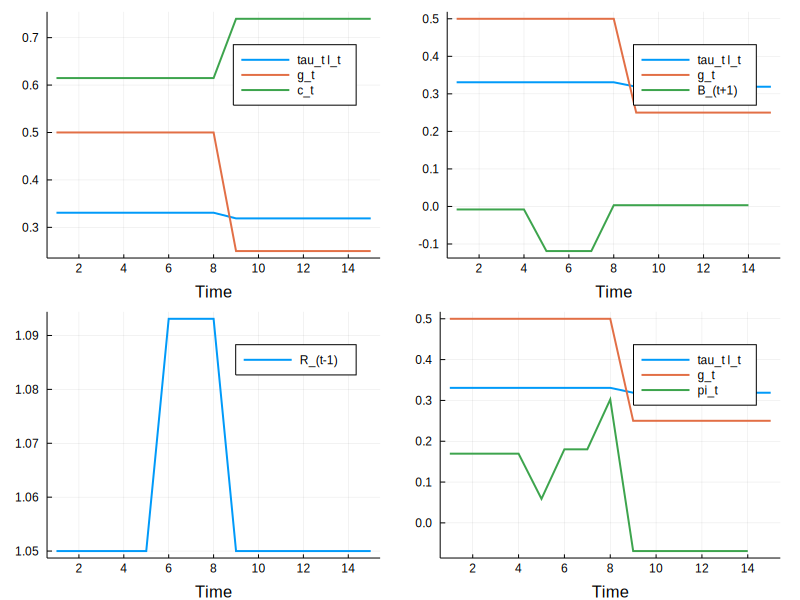

In [6]:
# Parameters
β = 1 / 1.05
P = [0.8 0.2 0.0
    0.0 0.5 0.5
    0.0 0.0 1.0]

# Possible states of the world
# Each column is a state of the world. The rows are [g d b s 1]
x_vals = [0.5 0.5 0.25;
        0.0 0.0  0.0;
        2.2 2.2  2.2;
        0.0 0.0  0.0;
        1.0 1.0  1.0]
Sg = [1.0 0.0 0.0 0.0 0.0]
Sd = [0.0 1.0 0.0 0.0 0.0]
Sb = [0.0 0.0 1.0 0.0 0.0]
Ss = [0.0 0.0 0.0 1.0 0.0]
proc = DiscreteStochProcess(P, x_vals)

econ = Economy(β, Sg, Sd, Sb, Ss, proc)
T = 15
path = compute_paths(econ, T)

gen_fig_1(path)

The call `gen_fig_2(path)` generates

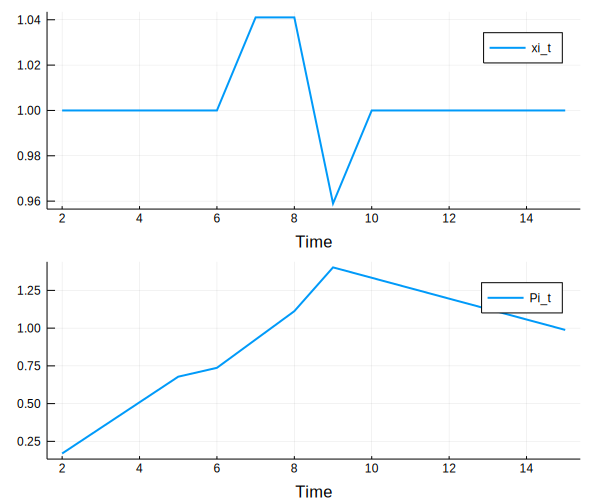

In [7]:
gen_fig_2(path)

See the original <a href=/_static/pdfs/firenze.pdf download>manuscript</a> for comments and interpretation

## Exercises


<a id='lqramsey-ex1'></a>

### Exercise 1

Modify the VAR example [given above](#lq-cc), setting

$$
g_{t+1} - \mu_g = \rho (g_{t-3} - \mu_g) + C_g w_{g, t+1}
$$

with $ \rho = 0.95 $ and $ C_g = 0.7 \sqrt{1 - \rho^2} $

Produce the corresponding figures

## Solutions

In [8]:
# parameters
β = 1 / 1.05
ρ, mg = .95, .35
A = [0. 0. 0. ρ  mg*(1-ρ);
     1. 0. 0. 0.       0.;
     0. 1. 0. 0.       0.;
     0. 0. 1. 0.       0.;
     0. 0. 0. 0.       1.]
C = zeros(5, 5)
C[1, 1] = sqrt(1 - ρ^2) * mg / 8
Sg = [1. 0. 0. 0. 0.]
Sd = [0. 0. 0. 0. 0.]
Sb = [0. 0. 0. 0. 2.135]
Ss = [0. 0. 0. 0. 0.]
proc = ContStochProcess(A, C)
econ = Economy(β, Sg, Sd, Sb, Ss, proc)

T = 50
path = compute_paths(econ, T)

(g = [0.35, 0.340597, 0.363379, 0.344775, 0.340915, 0.327744, 0.35677, 0.360344, 0.339556, 0.318683  …  0.376122, 0.387248, 0.361137, 0.309704, 0.353235, 0.394646, 0.376074, 0.329711, 0.321891, 0.386164], d = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], b = [2.135, 2.135, 2.135, 2.135, 2.135, 2.135, 2.135, 2.135, 2.135, 2.135  …  2.135, 2.135, 2.135, 2.135, 2.135, 2.135, 2.135, 2.135, 2.135, 2.135], s = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], c = [0.618132, 0.622834, 0.611442, 0.620745, 0.622675, 0.62926, 0.614747, 0.61296, 0.623354, 0.633791  …  0.605071, 0.599508, 0.612563, 0.63828, 0.616515, 0.595809, 0.605095, 0.628276, 0.632186, 0.60005], l = [0.968132, 0.96343, 0.974822, 0.965519, 0.963589, 0.957004, 0.971517, 0.973304, 0.96291, 0.952473  …  0.981193, 0.986756, 0.973701, 0.947984, 0.969749, 0.990455, 0.981169, 0.957988, 0.954078, 0.986214], p = [1.51687, 1.

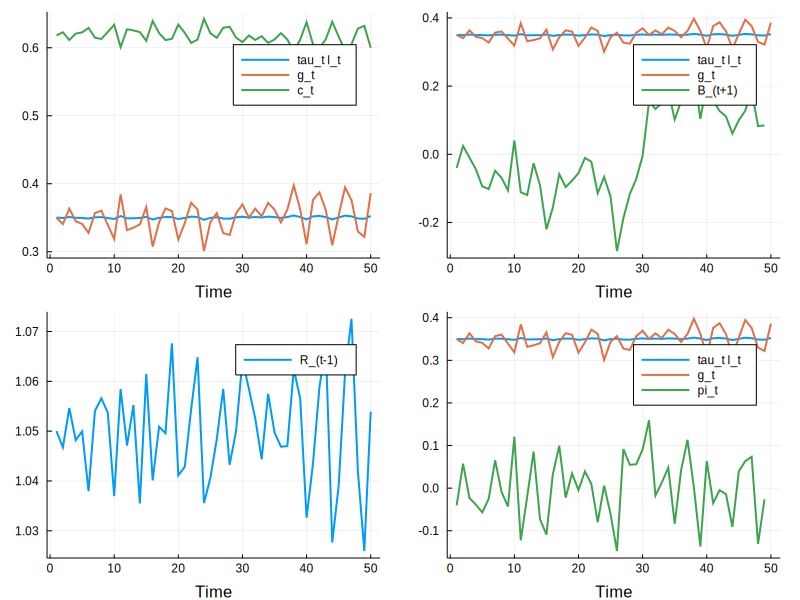

In [9]:
gen_fig_1(path)

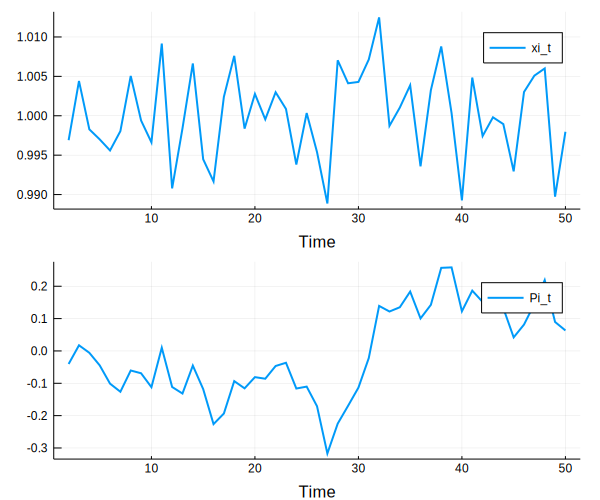

In [10]:
gen_fig_2(path)